In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
#INISIALISASI PARAMETER
D = 2
epochs = 50
ukuranPopulasi = 5 # N = populasi /ukuranPopulasi
BU = 10 #boundary high (UB)
BL = -10 #boundary low (LB)
CR = 0.9 #crossover, makin besar nilai maka kemungkinan crossover lebih tinggi
F = 0.5


In [3]:
#INISIALISASI POPULASI

induk = np.empty([ukuranPopulasi,D])
for i in range(ukuranPopulasi):
    for j in range(D):
        induk[i][j] = random.random()*(BU-BL)+BL
print(induk)

[[-3.84837491  7.67388899]
 [ 8.38056117  3.23810213]
 [ 5.99645001 -5.53114396]
 [-7.17944987 -0.61809134]
 [ 2.60967702 -5.79101633]]


In [4]:
#FUNGSI SPHERE  
def sphere(induk):
    matrix = induk.shape
    ukuranPopulasi = matrix[0]
    jumlahIndividu = matrix[1]

    Fobj = np.empty(ukuranPopulasi)

    for i in range(ukuranPopulasi):
        d = 0
        for j in range(jumlahIndividu):
            d += induk[i][j]**2
        Fobj[i] = d
    return Fobj

print(sphere(induk))



[73.69856172 80.71911095 66.55096616 51.92653731 40.34628425]


In [5]:
#FUNGSI SPHERE  
#def sphere(induk):
matrix = induk.shape
ukuranPopulasi = matrix[0]
jumlahIndividu = matrix[1]

hasilSphere = np.empty(ukuranPopulasi)

for i in range(ukuranPopulasi):
    d = 0
    for j in range(jumlahIndividu):
        d += induk[i][j]**2
    hasilSphere[i] = d
print(hasilSphere)

#print(sphere(induk))

[73.69856172 80.71911095 66.55096616 51.92653731 40.34628425]


In [6]:
#CROSSOVER
def crossover(induk,hasilSphere, j):
    matrix = induk.shape
    ukuranPopulasi = matrix[0]
    jumlahIndividu = matrix[1]

    random1 = random.randint(0,ukuranPopulasi-1)
    random2 = random.randint(0,ukuranPopulasi-1)
    random3 = random.randint(0,ukuranPopulasi-1)

    while random1 == random2:
        random2 = (random2+1)%ukuranPopulasi

    while random3 == random1 or random3 == random2:
        random3 = (random3+1)%ukuranPopulasi

    hasilCrossover = induk[random3][j] + F*(induk[random1][j] - induk[random2][j])
    return hasilCrossover

hasilCrossover = crossover(induk,hasilSphere, 1)
print(hasilCrossover)


5.694628440945862


In [8]:
print("induk awal: \n", induk)
print("hasil sphere: \n", hasilSphere)
print("hasil crossover: \n", hasilCrossover)

U = np.empty((1, D))

sphereTerbaik = np.empty(epochs+1)
sphereTerbaik[0] = hasilSphere.min()

for it in range(epochs):

    for i in range(ukuranPopulasi):
        for j in range(D):
            U[0][j] = induk[i][j]

        jrand = random.randint(0,D)

        for j in range(D):
            if random.random() < CR or j == jrand:
                v = crossover(induk, F, j)
                U[0][j] = v

        #replacement

        FobjU = sphere(U)
        if FobjU < hasilSphere[i]:
            hasilSphere[i] = FobjU
            for j in range(D):
                induk[i][j] = U[0][j]

    sphereTerbaik[it+1] = hasilSphere.min()

    print(sphereTerbaik)


induk awal: 
 [[-0.0002932  -0.10802724]
 [-0.00015453 -0.10802764]
 [-0.00020879 -0.10802654]
 [-0.00013946 -0.10802628]
 [-0.00020126 -0.10802738]]
hasil sphere: 
 [0.01166997 0.01167    0.01166978 0.0116697  0.01166996]
hasil crossover: 
 5.694628440945862
[1.16696958e-002 1.16695963e-002 1.56125113e-017 8.73992583e+245
 2.56585220e-289 1.16696958e-002 2.61671669e-232 9.75388064e+199
 1.03403809e+243 5.73659759e+252 2.07226689e+243 4.50794218e+257
 1.42177650e-312 1.84035954e-307 1.17278955e-311 1.17263511e-311
 2.75179990e+214 7.49229529e+247 2.53052093e+217 6.80648771e+199
 3.16251369e+180 5.30733197e-201 2.75179990e+214 3.68575205e+180
 1.44312567e-251 9.75388064e+199 3.61687973e-312 2.42606930e-308
 1.33360315e+241 4.47868432e-310 2.42387062e+214 2.40730476e-312
 3.10536870e-306 1.33360356e+241 8.49859314e-310 5.79100230e-085
 3.85026189e-312 2.00886795e-308 1.33360296e+241 8.39037136e-311
 3.06836125e+257 8.73989992e+245 1.28111131e-303 1.27613549e-303
 2.72778573e+135 1.120106

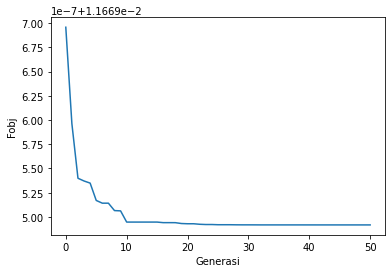

In [9]:
#PLOT
plt.plot(sphereTerbaik)
plt.xlabel('Generasi')
plt.ylabel('Fobj')
plt.show()